In [4]:
# import necessary lib
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import plotly as py
import plotly.graph_objs as go
import os
py.offline.init_notebook_mode(connected = True)
#print(os.listdir("../input"))
import datetime as dt
import missingno as msno
import warnings
warnings.filterwarnings("ignore")

In [2]:
# import machine learning module
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AffinityPropagation

In [6]:
df = pd.read_csv("netflix_titles.csv",encoding='latin1')
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,...,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
df = df[df.columns[:12]]
df.head()


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [8]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8809 entries, 0 to 8808
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8809 non-null   object
 1   type          8809 non-null   object
 2   title         8809 non-null   object
 3   director      6175 non-null   object
 4   cast          7984 non-null   object
 5   country       7978 non-null   object
 6   date_added    8799 non-null   object
 7   release_year  8809 non-null   int64 
 8   rating        8805 non-null   object
 9   duration      8806 non-null   object
 10  listed_in     8809 non-null   object
 11  description   8809 non-null   object
dtypes: int64(1), object(11)
memory usage: 826.0+ KB


In [9]:
# Check for missing values
df.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [10]:
# Replacments

df['country'] = df['country'].fillna(df['country'].mode()[0])


df['cast'].replace(np.nan, 'No Data',inplace  = True)
df['director'].replace(np.nan, 'No Data',inplace  = True)

# Drops

df.dropna(inplace=True)

# Drop Duplicates

df.drop_duplicates(inplace= True)

In [11]:
# We need to use the strip module first because some values in this dataset still contain spaces at the beginning or end of string.
df["date_added"] = df["date_added"].str.strip()

# convert dtype to datetime 
df["date_added"] = pd.to_datetime(df['date_added'])

# extract month and year
df['month_added']=df['date_added'].dt.month_name()
df['year_added'] = df['date_added'].dt.year


In [12]:
df.head(5)


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,month_added,year_added
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,No Data,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",September,2021
1,s2,TV Show,Blood & Water,No Data,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",September,2021
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",United States,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,September,2021
3,s4,TV Show,Jailbirds New Orleans,No Data,No Data,United States,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",September,2021
4,s5,TV Show,Kota Factory,No Data,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,September,2021


In [13]:
df.isnull().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
month_added     0
year_added      0
dtype: int64

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8792 entries, 0 to 8808
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       8792 non-null   object        
 1   type          8792 non-null   object        
 2   title         8792 non-null   object        
 3   director      8792 non-null   object        
 4   cast          8792 non-null   object        
 5   country       8792 non-null   object        
 6   date_added    8792 non-null   datetime64[ns]
 7   release_year  8792 non-null   int64         
 8   rating        8792 non-null   object        
 9   duration      8792 non-null   object        
 10  listed_in     8792 non-null   object        
 11  description   8792 non-null   object        
 12  month_added   8792 non-null   object        
 13  year_added    8792 non-null   int32         
dtypes: datetime64[ns](1), int32(1), int64(1), object(11)
memory usage: 996.0+ KB


<Axes: ylabel='count'>

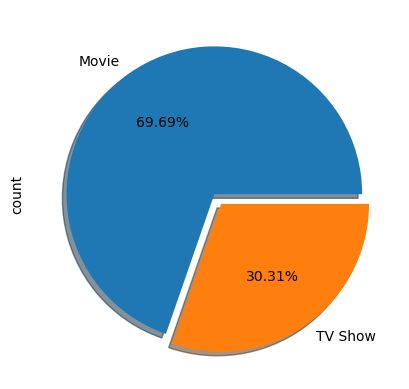

In [15]:
# Let's look at Type.
# Create our pie chart with labels

df["type"].value_counts().plot.pie(autopct='%1.2f%%',explode=[0,0.08], shadow = True)


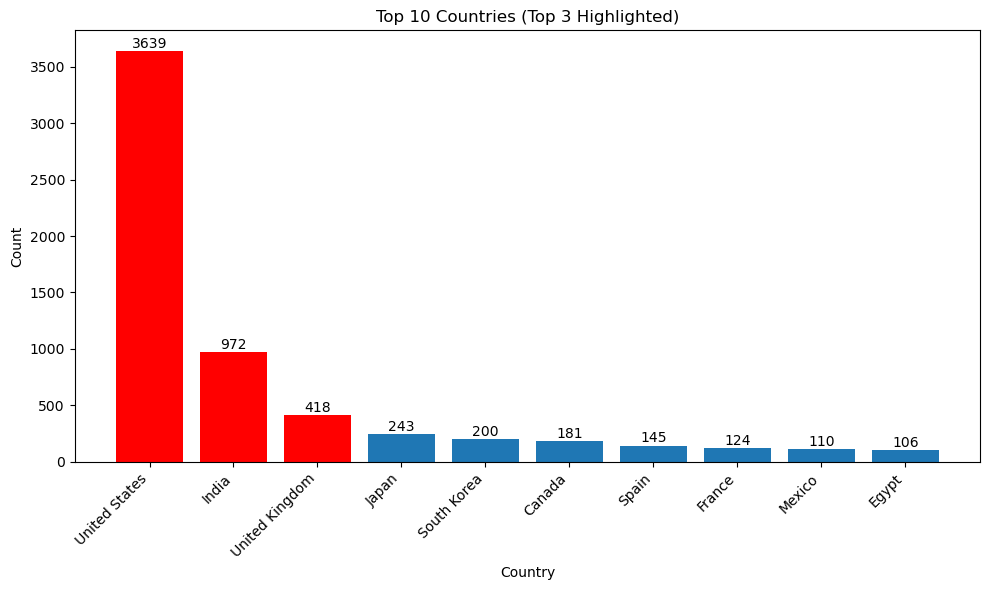

In [16]:
country_counts = df['country'].value_counts().head(10)  # Top 10 countries

# Create the bar chart
plt.figure(figsize=(10, 6))  # Adjust figure size as desired
bars = plt.bar(country_counts.index, country_counts.values)

# Add count values on top of bars
for bar, count in zip(bars, country_counts.values):
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval + 0.2, count, ha='center', va='bottom')

# Highlight top 3 countries
plt.bar(country_counts.index[:3], country_counts.values[:3], color='red')  # Adjust color

# Customize the plot
plt.xlabel('Country')
plt.ylabel('Count')
plt.title('Top 10 Countries (Top 3 Highlighted)')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()

plt.show()

In [18]:
# Count movies and TV shows per country
movie_counts_country = df[df['type'] == 'Movie']['country'].value_counts()
tv_show_counts_country = df[df['type'] == 'TV Show']['country'].value_counts()

# Combine counts into a single DataFrame with total 
df_counts = pd.DataFrame({'Movie': movie_counts_country, 'TV Show': tv_show_counts_country})
df_counts['total_by_country'] = df_counts.sum(axis=1)

# Sort by total count in descending order and select top 10
top_10_counts = df_counts.sort_values(by='total_by_country', ascending=False).head(10)

# Print the top 10 countries with movie, TV show, and total counts
print(top_10_counts)

                 Movie  TV Show  total_by_country
country                                          
United States   2495.0   1144.0            3639.0
India            893.0     79.0             972.0
United Kingdom   206.0    212.0             418.0
Japan             76.0    167.0             243.0
South Korea       41.0    159.0             200.0
Canada           122.0     59.0             181.0
Spain             97.0     48.0             145.0
France            75.0     49.0             124.0
Mexico            70.0     40.0             110.0
Egypt             92.0     14.0             106.0


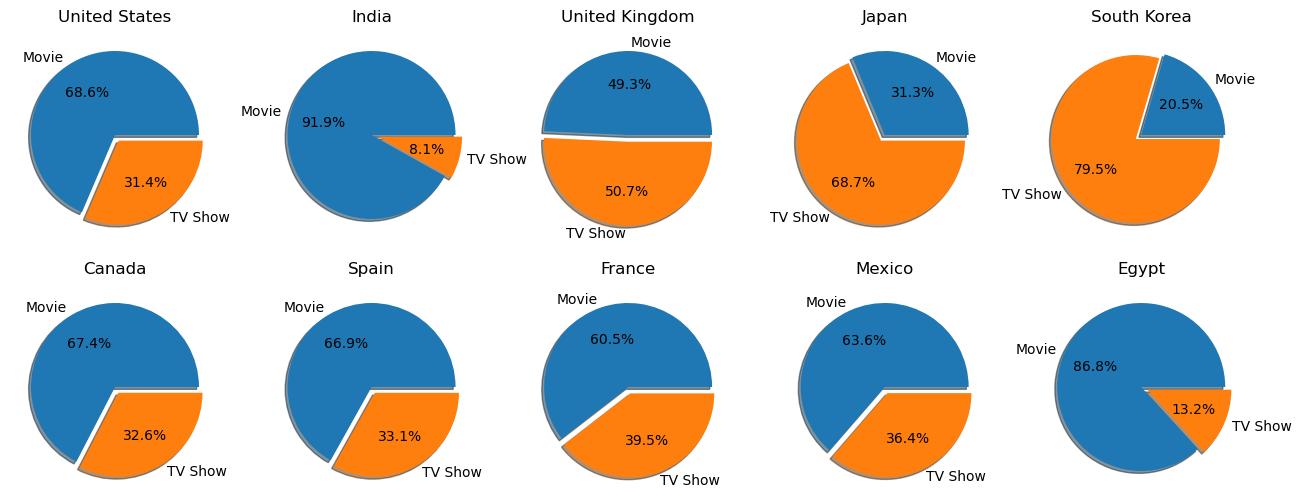

In [21]:
rows, cols = 2, 5
fig, axes = plt.subplots(rows, cols, figsize=(16, 6))  

# Counter to keep track of subplot position
counter = 0

# Loop through each row (country) in the DataFrame
for country, row in top_10_counts.iterrows():
  # Extract movie, tv show, and total counts
  movie_count = row['Movie']
  tv_show_count = row['TV Show']
  total_count = row['total_by_country']

  # Create labels for pie chart slices
  labels = ['Movie', 'TV Show']
 # Create pie chart slice sizes
  sizes = [movie_count, tv_show_count]

  # Select the current subplot based on counter
  ax = axes[counter // cols, counter % cols]

  # Create a pie chart on the selected subplot
  ax.pie(sizes, labels=labels, autopct="%1.1f%%", explode = [0,0.08], shadow = True)
  ax.set_title(country)

  # Increase counter for next subplot position
  counter += 1


In [22]:
# Count movies and TV shows per year_added
movie_counts_year = df[df['type'] == 'Movie']['year_added'].value_counts()
tv_show_counts_year = df[df['type'] == 'TV Show']['year_added'].value_counts()

# Combine counts into a single DataFrame with total (use add with fill_value=0 for missing values)
df_counts = pd.DataFrame({'Movie': movie_counts_year, 'TV Show': tv_show_counts_year})
df_counts['total_by_year'] = df_counts.sum(axis=1)

# Sort by total count in descending order
rating_agg = df_counts.sort_values(by='year_added', ascending=False)
print(rating_agg)

            Movie  TV Show  total_by_year
year_added                               
2024            1      1.0            2.0
2021          993    505.0         1498.0
2020         1284    595.0         1879.0
2019         1424    592.0         2016.0
2018         1237    411.0         1648.0
2017          836    349.0         1185.0
2016          251    175.0          426.0
2015           56     26.0           82.0
2014           19      5.0           24.0
2013            6      5.0           11.0
2012            3      NaN            3.0
2011           13      NaN           13.0
2010            1      NaN            1.0
2009            2      NaN            2.0
2008            1      1.0            2.0


In [23]:
#IThink we should drop year 2024, because data maybe incomplete 
df = df[df['year_added'] != 2024]
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8790 entries, 0 to 8806
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       8790 non-null   object        
 1   type          8790 non-null   object        
 2   title         8790 non-null   object        
 3   director      8790 non-null   object        
 4   cast          8790 non-null   object        
 5   country       8790 non-null   object        
 6   date_added    8790 non-null   datetime64[ns]
 7   release_year  8790 non-null   int64         
 8   rating        8790 non-null   object        
 9   duration      8790 non-null   object        
 10  listed_in     8790 non-null   object        
 11  description   8790 non-null   object        
 12  month_added   8790 non-null   object        
 13  year_added    8790 non-null   int32         
dtypes: datetime64[ns](1), int32(1), int64(1), object(11)
memory usage: 995.7+ KB


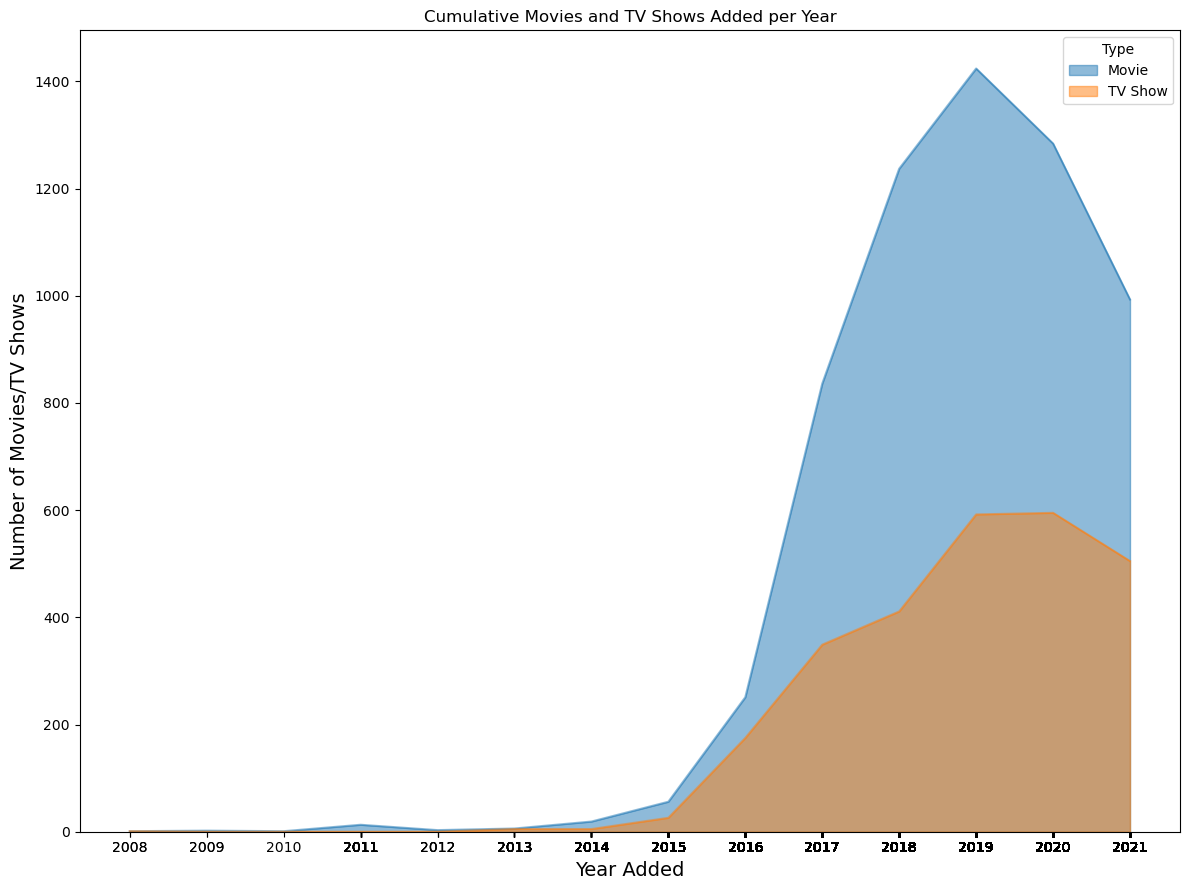

In [24]:
df_grouped = df.groupby(['year_added', 'type'])['type'].count().unstack(fill_value=0)

# Create the plot
fig, ax = plt.subplots(figsize=(12, 9))
df_grouped.plot(kind='area', stacked=False, ax=ax)
ax.set_title('Cumulative Movies and TV Shows Added per Year')
ax.set_xlabel('Year Added',fontsize = 14)
ax.set_ylabel('Number of Movies/TV Shows', fontsize = 14)
ax.legend(title='Type')

plt.xticks(df['year_added'])
plt.tight_layout()


In [25]:
# Count movies and TV shows per month_added
movie_counts_month = df[df['type'] == 'Movie']['month_added'].value_counts()
tv_show_counts_month = df[df['type'] == 'TV Show']['month_added'].value_counts()

# Combine counts into a single DataFrame with total (use add with fill_value=0 for missing values)
df_counts = pd.DataFrame({'Movie': movie_counts_month, 'TV Show': tv_show_counts_month})
df_counts['total_by_month'] = df_counts.sum(axis=1)

# Sort by total count in descending order
month_agg = df_counts.sort_values(by='total_by_month', ascending=False)

print(month_agg)


             Movie  TV Show  total_by_month
month_added                                
July           565      262             827
December       547      265             812
September      518      251             769
April          549      214             763
October        545      215             760
August         518      236             754
March          528      213             741
January        545      192             737
June           492      236             728
November       498      207             705
May            439      193             632
February       382      180             562


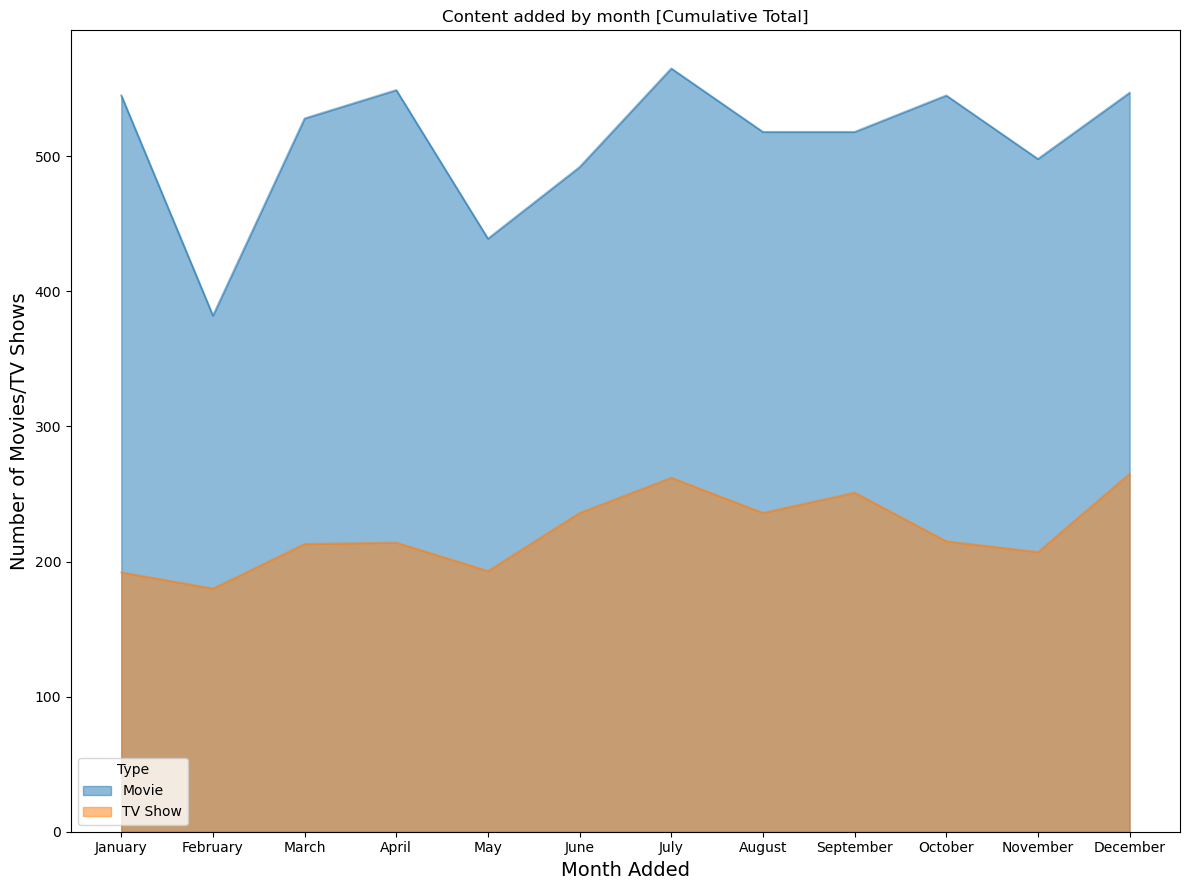

In [26]:
month_order = ['January', 'February', 'March', 'April', 'May', 'June',
               'July', 'August', 'September', 'October', 'November', 'December']

df['month_added'] = pd.Categorical(df['month_added'], categories=month_order, ordered=True)

df_grouped = df.groupby(['month_added', 'type'])['type'].count().unstack(fill_value=0)

# Create the plot
fig, ax = plt.subplots(figsize=(12, 9))
df_grouped.plot(kind='area', stacked=False, ax=ax)
ax.set_title('Content added by month [Cumulative Total]')
ax.set_xlabel('Month Added',fontsize = 14)
ax.set_ylabel('Number of Movies/TV Shows', fontsize = 14)
ax.legend(title='Type')
plt.xticks(range(len(month_order)), month_order)

plt.tight_layout()
plt.show()

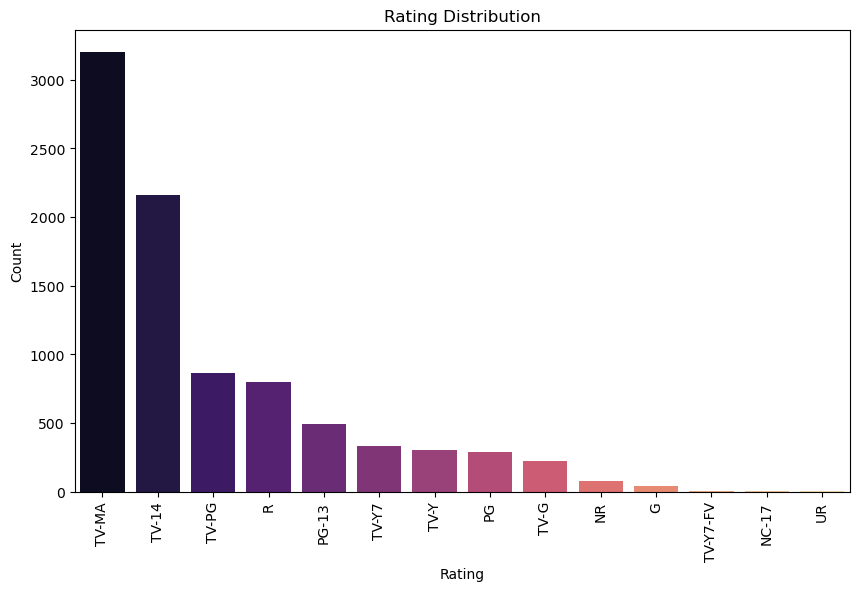

In [27]:
# Rating distribution
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='rating', palette='magma', order=df['rating'].value_counts().index)
plt.xlabel('Rating')
plt.ylabel('Count')
plt.title('Rating Distribution')
plt.xticks(rotation=90)
plt.show()

<Axes: ylabel='rating'>

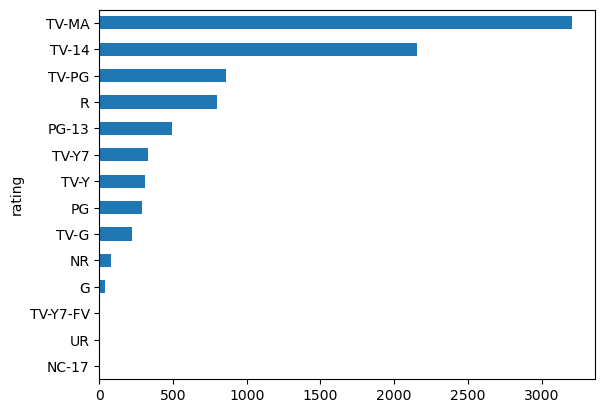

In [33]:
# What is the distribution of content ratings on Netflix? How does content rating vary between different countries or regions?
df.rating.value_counts().sort_values().plot(kind='barh')



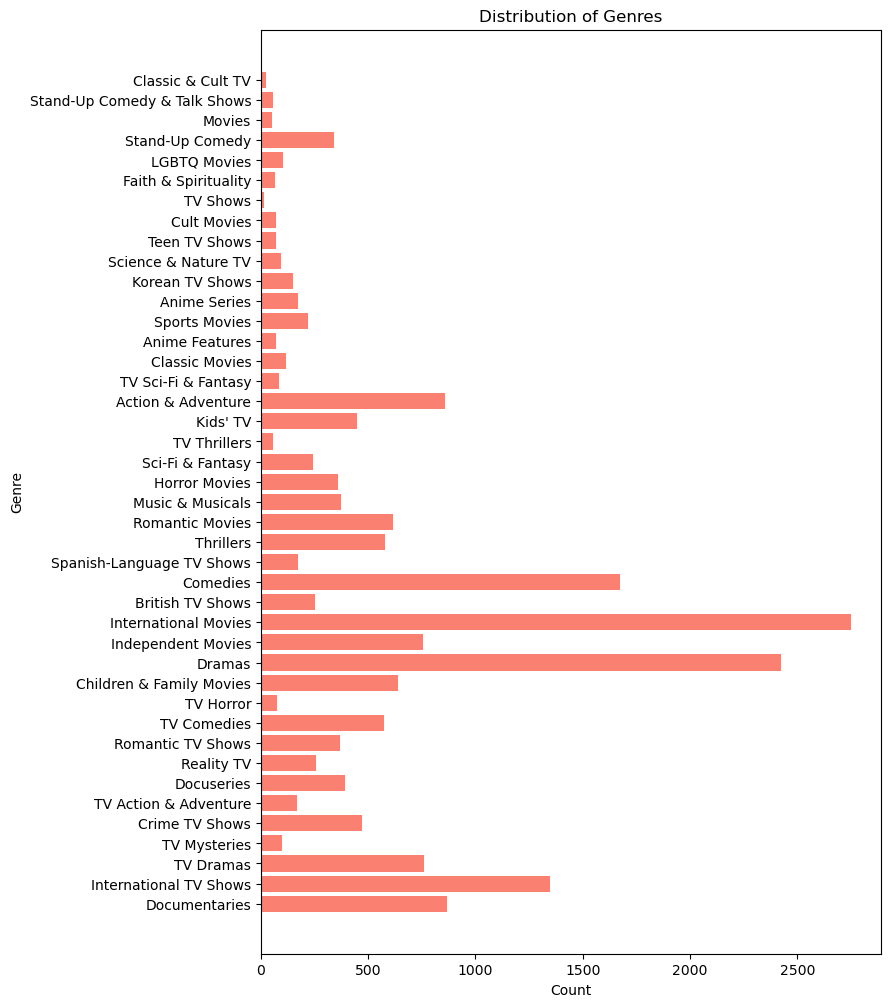

In [35]:
from collections import Counter

# Splitting and counting genres
genres = df['listed_in'].apply(lambda x: x.split(','))
genres = [genre.strip() for sublist in genres for genre in sublist]
genre_counts = Counter(genres)

plt.figure(figsize=(8, 12))
plt.barh(list(genre_counts.keys()), list(genre_counts.values()), color='salmon')
plt.xlabel('Count')
plt.ylabel('Genre')
plt.title('Distribution of Genres')
plt.show()

In [36]:
director = df.director.value_counts().nlargest(10).to_frame().reset_index()
director

,director,count
0,No Data,2621
1,Rajiv Chilaka,19
2,"RaÃºl Campos, Jan Suter",18
3,Suhas Kadav,16
4,Marcus Raboy,16
5,Jay Karas,14
6,Cathy Garcia-Molina,13
7,Martin Scorsese,12
8,Jay Chapman,12
9,Youssef Chahine,12
